Сырые данные о поездках в жёлтом такси можно найти на сайте TLC: www.nyc.gov/html/tlc/html/about/trip_record_data.shtml Эти данные разбиты на файлы по месяцам. В каждом из файлов содержится следующая информация о поездках:

время начала поездки
время окончания поездки
долгота и широта точки начала поездки
долгота и широта точки окончания поездки
количество пассажиров
расстояние по счётчику
тип тарифа (одна из шести категорий)
способ оплаты (одна из шести категорий)
стоимость поездки по счётчику
налог на счётчик
доплата за поездки в пиковые часы и ночью
доплата за проезд по платным дорогам
доплата за проезд, взимаемая с каждой поездки с января 2015
размер чаевых
общая стоимость поездки
провайдер данных (одна из двух категорий)
бинарный флаг, показывающий, были ли данные о поезде получены немедленно после её окончания, или какое-то время хранились в памяти автомобиля.
Подробнее: http://www.nyc.gov/html/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

Задача проекта — научиться предсказывать количество поездок в ближайшие часы в каждом районе Нью-Йорка; для простоты мы определим прямоугольные районы. Для того, чтобы её решить, сырые данные необходимо агрегировать по часам и районам. Агрегированные данные будут представлять собой почасовые временные ряды с количествами поездок из каждого района.

Задачу прогнозирования таких рядов можно решать с помощью авторегрессионных моделей, прогнозируя каждый ряд независимо. Ряды явно имеют сложную сезонность — суточную, недельную и годовую, поэтому для их моделирования понадобится использовать модель ARIMA с дополнительной регрессией на внешние признаки.

Данные выложены в файлах по месяцам. Скачайте так много данных жёлтого такси, как сможете; чем больше вы будете использовать данных, тем точнее получатся ваши прогнозы. Если вы решите использовать не все данные, а только часть, выбирайте её по времени с конца. Абсолютный минимум необходимых данных — 6 месяцев: один, последний месяц, вам понадобится для тестирования, предшествующие 5 — для обучения. По 5 месяцам можно построить прогнозы, учитывающие дневную и недельную сезонности, но в данных есть и годовая. Чтобы её учесть, необходимы данные как минимум за 2 года.



Обработайте сырые данные по следующей схеме.

- Почистите данные от ошибок и аномалий.
- Отбросьте минуты и секунды во времени начала поездки.
- Нью-Йорк вписан в прямоугольник от -74.25559 до -73.70001 градусов долготы и от 40.49612 до 40.91553 широты. - Разбейте этот прямоугольник на 2500 одинаковых прямоугольных областей — по 50 интервалов вдоль каждой оси.
- Посчитайте количество поездок за каждый час из каждой области. Не забудьте, что если в сырых данных для какой-то пары час-область нет ни одной записи, то в агрегированных данных для неё должен стоять 0.
- В дальнейшем, когда вы будете предсказывать получившиеся ряды, нужно будет загружать ваши прогнозы на kaggle, поэтому нужно, чтобы идентификаторы ячеек были определены однозначно. В следующем файле даны идентификаторы ячеек, которые вам нужно использовать, и географические координаты их границ:

regions.csv

Для сдачи задания этой недели вам нужно агрегировать только данные за май 2016, но, когда задание будет сдано, не забудьте запустить ваш агрегирующий скрипт на всех остальных месяцах, которые вы собираетесь использовать при прогнозировании.

Чтобы сдать задание, выполните следующую последовательность действий.

1. Загрузите данные за май 2016 года.

2. Проведите фильтрацию: удалите поездки с

- нулевой длительностью
- нулевым количеством пассажиров
- нулевым расстоянием поездки по счётчику
- координатами начала, не попадающими в прямоугольник Нью-Йорка
- Можно придумать ещё какие-то критерии для фильтрации данных; тем не менее, не стоит применять дополнительные фильтры: начиная с четвёртой недели вам предстоит сравнивать качество ваших прогнозов с качеством прогнозов других слушателей, и, чтобы это сравнение было корректным, нужно, чтобы данные у всех были предобработаны одинаково.

3. Агрегируйте данные за май 2016 года по часам и областям (можно использовать функцию stats.binned_statistic_2d, с которой вы сталкивались в заданиях четвёртого курса). Не забудьте проверить, что идентификаторы, которые вы присваиваете ячейкам, соответствуют приложенному выше файлу.

4. Выведите первые строки полученной таблицы с указанием времени, идентификатора зоны и количества поездок.

5. Постройте график количества поездок жёлтого такси из ячейки, содержащей Empire State Building.

6. Посчитайте, сколько в мае 2016 было пар час-ячейка, для которых не было совершено ни одной поездки.

7. Загрузите ноутбук в форму ниже

Review criteria
В качестве ответа в этом задании вам нужно загрузить ноутбук; убедитесь, что ход анализа, который вы провели, описан достаточно подробно для того, чтобы ваши сокурсники поняли, что вы делали и почему.

In [1]:
#Загрузите данные за май 2016 года.
import numpy as np
import pandas as pd
from scipy.stats import binned_statistic_2d
import datetime
import matplotlib.pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/kira/prog/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
df= pd.read_csv('taxi_may_2016_after1task.csv')

In [2]:
may = pd.read_csv("yellow_tripdata_2016-05.csv")
may.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-05-01 00:00:00,2016-05-01 00:17:31,1,3.60,-73.985901,40.768040,1,N,-73.983986,40.730099,1,15.0,0.5,0.5,1.50,0.0,0.3,17.80
1,2,2016-05-01 00:00:00,2016-05-01 00:07:31,1,1.68,-73.991577,40.744751,1,N,-73.975700,40.765469,1,7.5,0.5,0.5,0.88,0.0,0.3,9.68
2,2,2016-05-01 00:00:00,2016-05-01 00:07:01,6,1.09,-73.993073,40.741573,1,N,-73.980995,40.744633,1,6.5,0.5,0.5,1.56,0.0,0.3,9.36
3,2,2016-05-01 00:00:00,2016-05-01 00:19:47,1,4.21,-73.991943,40.684601,1,N,-74.002258,40.733002,1,17.0,0.5,0.5,3.66,0.0,0.3,21.96
4,2,2016-05-01 00:00:00,2016-05-01 00:06:39,1,0.56,-74.005280,40.740192,1,N,-73.997498,40.737564,1,6.0,0.5,0.5,1.46,0.0,0.3,8.76


In [4]:
# Почистите данные от ошибок и аномалий.
# NaN'ов нет
may.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64


import datetime
d1 = datetime.datetime.strptime("2016-05-01 00:00:00", "%Y-%m-%d %H:%M:%S")
d2 = datetime.datetime.strptime("2016-05-01 00:00:00", "%Y-%m-%d %H:%M:%S")
print (d2 - d1)

In [3]:
# Проведите фильтрацию: удалите поездки с
# нулевой длительностью
df = may.drop(may[may.tpep_pickup_datetime==may.tpep_dropoff_datetime].index)

In [4]:
print may.shape, df.shape

(11836853, 19) (11824585, 19)


In [ ]:
df['hour'] = pd.to_datetime(df.tpep_pickup_datetime).apply(lambda x: pd.Timestamp(x.year, x.month, x.day, x.hour, 0, 0))
#ar =ar.values

arr = np.zeros(len(ar))
for i in range(len(ar)):
    arr[i]=pd.to_datetime(ar[i])

In [10]:
#print arr
#df['hour']=arr
df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,hour
11836848,2,2016-05-27 12:24:58,2016-05-27 12:39:38,1,0.0,0.0,0.0,1,N,0.0,0.0,2,9.5,0.5,0.5,0.0,0.0,0.3,10.8,2016-05-27 12:00:00
11836849,2,2016-05-27 12:44:54,2016-05-27 12:48:17,1,0.0,0.0,0.0,1,N,0.0,0.0,2,4.0,0.5,0.5,0.0,0.0,0.3,5.3,2016-05-27 12:00:00
11836850,2,2016-05-27 12:48:51,2016-05-27 13:40:56,1,0.0,0.0,0.0,1,N,0.0,0.0,2,28.5,0.5,0.5,0.0,0.0,0.3,29.8,2016-05-27 12:00:00
11836851,2,2016-05-27 14:18:21,2016-05-27 14:38:13,1,0.0,0.0,0.0,1,N,0.0,0.0,2,12.0,0.5,0.5,0.0,0.0,0.3,13.3,2016-05-27 14:00:00
11836852,2,2016-05-27 14:38:36,2016-05-27 15:10:15,1,0.0,0.0,0.0,1,N,0.0,0.0,2,4886.0,0.5,0.5,0.0,0.0,0.3,4887.3,2016-05-27 14:00:00


type(df.tpep_pickup_datetime.iloc[2])

for i in range(df.shape[0]):
    df.tpep_pickup_datetime.iloc[i]="%s"%df.tpep_pickup_datetime.iloc[i].split(':')[0] + ":00:00"

In [11]:
#Проведите фильтрацию: удалите поездки с
#нулевой длительностью
#нулевым количеством пассажиров
#нулевым расстоянием поездки по счётчику
df = df.drop(df[(df.tpep_pickup_datetime==df.tpep_dropoff_datetime)|(df.passenger_count==0)|(df.trip_distance==0)].index)
print df.shape

(11763422, 20)


In [12]:
#координатами начала, не попадающими в прямоугольник Нью-Йорка
#Нью-Йорк вписан в прямоугольник от -74.25559 до -73.70001 градусов долготы и от 40.49612 до 40.91553 широты
df = df.drop(df[(df.pickup_longitude<=-74.25559)|(df.pickup_longitude>=-73.70001)|(df.pickup_latitude<=40.49612)|(df.pickup_latitude>=40.91553)].index)
print df.shape

(11626521, 20)


In [13]:
#Агрегируйте данные за май 2016 года по часам и областям (можно использовать функцию stats.binned_statistic_2d,
#с которой вы сталкивались в заданиях четвёртого курса). Не забудьте проверить, что идентификаторы, 
#которые вы присваиваете ячейкам, соответствуют приложенному выше файлу.
#Выведите первые строки полученной таблицы с указанием времени, идентификатора зоны и количества поездок.
bins = pd.read_csv("regions.csv",sep=';')
bins.head()

,region,west,east,south,north
0,1,-74.25559,-74.244478,40.496120,40.504508
1,2,-74.25559,-74.244478,40.504508,40.512896
2,3,-74.25559,-74.244478,40.512896,40.521285
3,4,-74.25559,-74.244478,40.521285,40.529673
4,5,-74.25559,-74.244478,40.529673,40.538061


In [37]:
bins['west'].unique()

array([-74.25559  , -74.2444784, -74.2333668, -74.2222552, -74.2111436,
       -74.200032 , -74.1889204, -74.1778088, -74.1666972, -74.1555856,
       -74.144474 , -74.1333624, -74.1222508, -74.1111392, -74.1000276,
       -74.088916 , -74.0778044, -74.0666928, -74.0555812, -74.0444696,
       -74.033358 , -74.0222464, -74.0111348, -74.0000232, -73.9889116,
       -73.9778   , -73.9666884, -73.9555768, -73.9444652, -73.9333536,
       -73.922242 , -73.9111304, -73.9000188, -73.8889072, -73.8777956,
       -73.866684 , -73.8555724, -73.8444608, -73.8333492, -73.8222376,
       -73.811126 , -73.8000144, -73.7889028, -73.7777912, -73.7666796,
       -73.755568 , -73.7444564, -73.7333448, -73.7222332, -73.7111216])

In [38]:
bins['east'].unique()

array([-74.2444784, -74.2333668, -74.2222552, -74.2111436, -74.200032 ,
       -74.1889204, -74.1778088, -74.1666972, -74.1555856, -74.144474 ,
       -74.1333624, -74.1222508, -74.1111392, -74.1000276, -74.088916 ,
       -74.0778044, -74.0666928, -74.0555812, -74.0444696, -74.033358 ,
       -74.0222464, -74.0111348, -74.0000232, -73.9889116, -73.9778   ,
       -73.9666884, -73.9555768, -73.9444652, -73.9333536, -73.922242 ,
       -73.9111304, -73.9000188, -73.8889072, -73.8777956, -73.866684 ,
       -73.8555724, -73.8444608, -73.8333492, -73.8222376, -73.811126 ,
       -73.8000144, -73.7889028, -73.7777912, -73.7666796, -73.755568 ,
       -73.7444564, -73.7333448, -73.7222332, -73.7111216, -73.70001  ])

yb = np.zeros(len(bins['west'].unique())+1)
yb[0:-1]=bins['west'].unique()
yb[-1]=bins['east'].unique()[-1]

xb = np.zeros(len(bins['south'].unique())+1)
xb[0:-1]=bins['south'].unique()
xb[-1]=bins['north'].unique()[-1]

ret =binned_statistic_2d(df.pickup_latitude, df.pickup_longitude, None, 'count', bins=[xb,yb])
ret.statistic

ret.statistic.shape

len(ret.binnumber)

df['region']= ret.binnumber

In [26]:
#границы
west = -74.25559
east = -73.70001
south = 40.49612
north = 40.91553
n=50
def longitude_number (x):
    return int(np.floor(n*(x-west)/(east-west)))
def latitude_number (x):
    return int(np.floor(n*(x-south)/(north-south)))
def region_number (longitude, latitude):
    return 1+n*longitude_number(longitude)+latitude_number(latitude)
df['region'] = df[['pickup_longitude','pickup_latitude']].apply(lambda x: region_number(*x), axis=1)

In [20]:
##Выведите первые строки полученной таблицы с указанием времени, идентификатора зоны и количества поездок.
pd.crosstab(df.hour,df.region ).head()

region,15,16,25,27,32,45,49,61,77,80,...,2476,2478,2479,2481,2482,2483,2484,2485,2486,2487
hour,,,,,,,,,,,,,,,,,,,,,
2016-05-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-05-01 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-05-01 01:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-05-01 02:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-05-01 03:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Постройте график количества поездок жёлтого такси из ячейки, содержащей Empire State Building.
#Координаты	40.744, -73.9721

cell =np.where((bins.south>=40.744) & (bins.west>=-73.9721))[0][0]

In [29]:
cros =pd.crosstab(df.hour,df.region )

In [8]:
# вставляем пропущенные регионы и заполняем нулями
n=50
#rr = np.zeros(range(n*n))
binreg = np.zeros([int(n)**2])
binreg[np.array(df['region'].unique(),dtype=int)] =1
bins_hours = pd.date_range(start=df['hour'].iloc[0],end=df['hour'].iloc[-1], freq='H')
newd1 = pd.DataFrame(index=list(np.where(binreg==0)),columns =bins_hours)
newd1.fillna(0, inplace = True)
cros1 =pd.crosstab(df.region,df.hour)
cros1 =cros1.append(newd1).sort_index()
cros1.fillna(0, inplace = True)
cros2 = np.array(cros1)

In [10]:
cros2.nonzero()

(array([  15,   16,   25, ..., 2486, 2487, 2487]),
 array([478, 547,  86, ..., 235, 290, 535]))

In [33]:
#Постройте график количества поездок жёлтого такси из ячейки, содержащей Empire State Building.
empire_longitude = -73.9857
empire_latitude = 40.7484
empire = cros[region_number(empire_longitude,empire_latitude)]
empire.head()

hour
2016-05-01 00:00:00    881
2016-05-01 01:00:00    713
2016-05-01 02:00:00    533
2016-05-01 03:00:00    418
2016-05-01 04:00:00    353
Name: 1231, dtype: int64

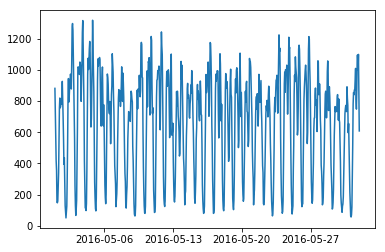

In [34]:
#Постройте график количества поездок жёлтого такси из ячейки, содержащей Empire State Building.
plt.plot(empire)

In [18]:
#Посчитайте, сколько в мае 2016 было пар час-ячейка, для которых не было совершено ни одной поездки.
#
print np.count_nonzero(cros2)
print cros2.size
print cros2.size - np.count_nonzero(cros2)
print "Ответ:"
len(cros2[cros2==0])

144032
2987500
2843468
Ответ:


2843468

In [37]:
# Сохраним
df.to_csv('taxi_may_2016_after1task.csv')

In [19]:
cros1.to_csv('may_2016_agg.csv')